In [101]:
import pandas as pd

df = pd.read_csv('exemplos_limpeza_dados.csv', sep=',')
df

,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
1,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3th,No
4,Spain,38.0,61000.0,1st,No
5,Germany,40.0,NaN,2nd,Yes
6,Germany,40.0,NaN,2nd,Yes
7,France,35.0,58000.0,2nd,Yes
8,Spain,NaN,52000.0,1st,No
9,France,48.0,79000.0,3th,Yes


<Axes: >

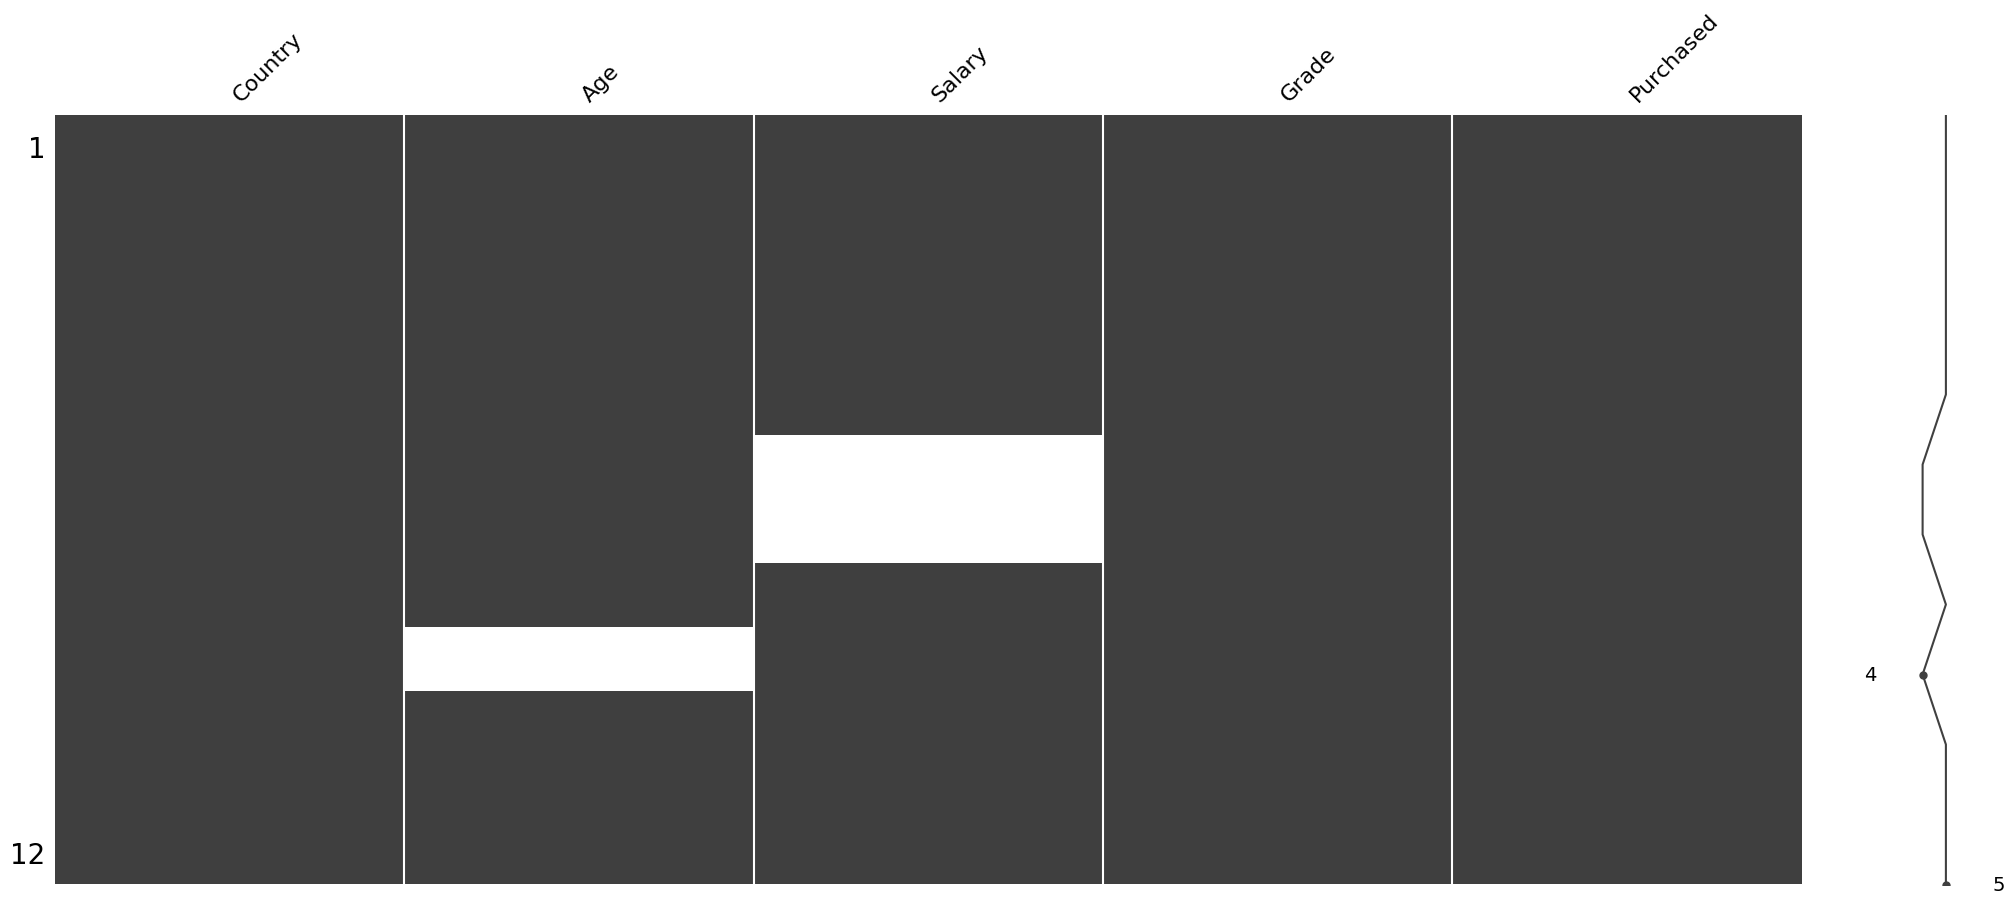

In [102]:
# Uma outra forma de verificar dados faltantes é através da biblioteca missingno
import missingno as msno

msno.matrix(df)

In [103]:
# Remover dados duplicados
df.drop_duplicates(inplace=True)
df

,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3th,No
4,Spain,38.0,61000.0,1st,No
5,Germany,40.0,NaN,2nd,Yes
7,France,35.0,58000.0,2nd,Yes
8,Spain,NaN,52000.0,1st,No
9,France,48.0,79000.0,3th,Yes
10,Germany,50.0,83000.0,2nd,No
11,France,37.0,67000.0,3th,Yes


In [104]:
# Preencher dados faltantes de idade com a média da coluna de mesmo nome
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Preenche dados faltantes de salário com a mediana da coluna de mesmo nome
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df

,Country,Age,Salary,Grade,Purchased
0,France,44.000000,72000.0,1st,No
2,Spain,27.000000,48000.0,1st,Yes
3,Germany,30.000000,54000.0,3th,No
4,Spain,38.000000,61000.0,1st,No
5,Germany,40.000000,61000.0,2nd,Yes
7,France,35.000000,58000.0,2nd,Yes
8,Spain,38.777778,52000.0,1st,No
9,France,48.000000,79000.0,3th,Yes
10,Germany,50.000000,83000.0,2nd,No
11,France,37.000000,67000.0,3th,Yes


Porém, para uma machine learning interpretar os dados, será necessário transformar os dados de string em dados numéricos.

Para isto, podemos utilizar algumas funções da biblioteca sklearn.

Tratamento dos dados categóricos, utilizando a transformação "label encoding".

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

le = LabelEncoder()

# Criamos uma nova coluna com a transformação dos dados de Purchased (Yes,No) para dados numéricos (0 e 1)
df['Purchased_encoder'] = le.fit_transform(df['Purchased'])

# Aqui realizamos a mesma coisa, porém para dados de Grade (1st, 2nd, 3th)
df['Grade_encoder'] = le.fit_transform(df['Grade'])
df

,Country,Age,Salary,Grade,Purchased,Purchased_encoder,Grade_encoder
0,France,44.000000,72000.0,1st,No,0,0
2,Spain,27.000000,48000.0,1st,Yes,1,0
3,Germany,30.000000,54000.0,3th,No,0,2
4,Spain,38.000000,61000.0,1st,No,0,0
5,Germany,40.000000,61000.0,2nd,Yes,1,1
7,France,35.000000,58000.0,2nd,Yes,1,1
8,Spain,38.777778,52000.0,1st,No,0,0
9,France,48.000000,79000.0,3th,Yes,1,2
10,Germany,50.000000,83000.0,2nd,No,0,1
11,France,37.000000,67000.0,3th,Yes,1,2


Utilizando a técnica de One Hot Encoder para tratar o campo categórico "Country"

In [106]:
# Retorna um DataFrame com todos os valores únicos da coluna "Country" para cada linha, porém como booleano
aux = pd.get_dummies(df['Country'])

# Concatena dois dataFrames, axis = 1 significa que irá adicionar colunas
df_final = pd.concat([df, aux], axis=1)
df_final

,Country,Age,Salary,Grade,Purchased,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,France,44.000000,72000.0,1st,No,0,0,True,False,False
2,Spain,27.000000,48000.0,1st,Yes,1,0,False,False,True
3,Germany,30.000000,54000.0,3th,No,0,2,False,True,False
4,Spain,38.000000,61000.0,1st,No,0,0,False,False,True
5,Germany,40.000000,61000.0,2nd,Yes,1,1,False,True,False
7,France,35.000000,58000.0,2nd,Yes,1,1,True,False,False
8,Spain,38.777778,52000.0,1st,No,0,0,False,False,True
9,France,48.000000,79000.0,3th,Yes,1,2,True,False,False
10,Germany,50.000000,83000.0,2nd,No,0,1,False,True,False
11,France,37.000000,67000.0,3th,Yes,1,2,True,False,False


In [107]:
# Remover colunas que não serão mais usadas e deixar apenas aquelas que já foram tratadas
df_final.drop(columns=['Country', 'Grade', 'Purchased'], inplace=True)
df_final

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,44.000000,72000.0,0,0,True,False,False
2,27.000000,48000.0,1,0,False,False,True
3,30.000000,54000.0,0,2,False,True,False
4,38.000000,61000.0,0,0,False,False,True
5,40.000000,61000.0,1,1,False,True,False
7,35.000000,58000.0,1,1,True,False,False
8,38.777778,52000.0,0,0,False,False,True
9,48.000000,79000.0,1,2,True,False,False
10,50.000000,83000.0,0,1,False,True,False
11,37.000000,67000.0,1,2,True,False,False


In [108]:
df_final.to_csv('dados_tratados.csv', index=False, sep=',')


Transforma os dados em escala com Normalização e Padronização

In [109]:
colunas = df_final.columns

# Padronização (Os valores estarão de -1 até 1)
standard_scaler = StandardScaler()
df_final_padronizado = pd.DataFrame(standard_scaler.fit_transform(df_final), columns=colunas)
df_final_padronizado.head()

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,0.758874,0.772568,-1.0,-1.083473,1.224745,-0.654654,-0.654654
1,-1.711504,-1.408800,1.0,-1.083473,-0.816497,-0.654654,1.527525
2,-1.275555,-0.863458,-1.0,1.324244,-0.816497,1.527525,-0.654654
3,-0.113024,-0.227226,-1.0,-1.083473,-0.816497,-0.654654,1.527525
4,0.177609,-0.227226,1.0,0.120386,-0.816497,1.527525,-0.654654


In [110]:
# Normalização (Os valores estarão de 0 até 1)
# É possível alterar o valor da escala a partir do parametro: feature_range(int,int)
scaler_minMax = MinMaxScaler()
df_final_normalizado = pd.DataFrame(scaler_minMax.fit_transform(df_final), columns=colunas)
df_final_normalizado.head()

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,0.739130,0.685714,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0
2,0.130435,0.171429,0.0,1.0,0.0,1.0,0.0
3,0.478261,0.371429,0.0,0.0,0.0,0.0,1.0
4,0.565217,0.371429,1.0,0.5,0.0,1.0,0.0


In [111]:
df_final_padronizado.to_csv('dados_padronizados.csv', index=False, sep=',')
df_final_normalizado.to_csv('dados_normalizados.csv', index=False, sep=',')